# Market basket analysis

## Overview of the Dataset

The dataset used for this analysis is called OnlineRetail.xlsx. It contains transactional data from an online retail store. The dataset includes several columns such as InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country.



## Purpose of the Analysis

The purpose of this analysis is to conduct market basket analysis using association rule mining techniques. Market basket analysis is a data mining method used to identify relationships between products purchased together by customers. By analyzing transactional data, we aim to uncover patterns in customer purchasing behavior, identify frequently co-occurring items, and derive actionable insights for business decision-making.



## Tasks Involved

The analysis involves several key tasks:

1. **Data Preprocessing**: This includes loading the dataset, handling missing values, and converting data types if necessary.

2. **Applying the Apriori Algorithm**: We will use the Apriori algorithm, a popular method for market basket analysis, to generate association rules from the transaction data.

3. **Adjusting Parameters**: We will experiment with different values of parameters such as support, confidence, and lift to observe their impact on the generated rules.

4. **Interpreting Results**: We will analyze the generated association rules to identify meaningful patterns and associations between items.

5. **Providing Business Insights**: Based on the discovered patterns, we will provide insights and recommendations for the business, such as product bundling strategies or cross-selling opportunities.



In [16]:
pip install mlxtend

  Obtaining dependency information for mlxtend from https://files.pythonhosted.org/packages/1c/07/512f6a780239ad6ce06ce2aa7b4067583f5ddcfc7703a964a082c706a070/mlxtend-0.23.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 262.6 kB/s eta 0:00:06
    --------------------------------------- 0.0/1.4 MB 262.6 kB/s eta 0:00:06
    --------------------------------------- 0.0/1.4 MB 262.6 kB/s eta 0:00:06
    --------------------------------------- 0.0/1.4 MB 262.6 kB/s eta 0:00:06
   - -------------------------------------- 0.0/1.4 MB 115.5 kB/s eta 0:00:13
   - -------------------------------------- 0.1/1.4 MB 163.6 kB/s eta 0:00:09
   - -------------------------------------- 0.1/1.4 MB 163.6 kB/s eta 0:00:09
   -- ------------------------------------- 0.1

**Import necessary libraries and read the dataset.**

In [30]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

df = pd.read_excel('OnlineRetail.xlsx')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Data Cleanup**

In [31]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]


**Select data from France and prepare it for one-hot encoding.**

In [32]:
basket = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))


**One-hot encoding and dropping the 'POSTAGE' column.**

In [33]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)


**Generate frequent itemsets with a support of 7%.**

In [34]:
frequent_itemsets = apriori(basket_sets, min_support=0.07, use_colnames=True)


C:\Users\Hp Elitebook\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


**Generate association rules with a minimum lift of 1.**

In [35]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859,0.964734
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383,0.959283
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,0.976465
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,0.979224
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135,0.968652


**Filter the DataFrame based on lift and confidence thresholds.**

In [36]:
filtered_rules = rules[(rules['lift'] >= 6) & (rules['confidence'] >= 0.8)]
filtered_rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,0.976465
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,0.979224
17,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735,0.956140
18,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041,0.993343
19,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122,0.981725


**Filter the DataFrame based on lift and confidence thresholds.**

In [37]:
aa = rules[(rules['lift'] >= 6) & (rules['confidence'] >= 0.8)]
aa.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878,0.976465
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181,0.979224
17,(SET/6 RED SPOTTY PAPER PLATES),(SET/20 RED RETROSPOT PAPER NAPKINS),0.127551,0.132653,0.102041,0.800000,6.030769,0.085121,4.336735,0.956140
18,(SET/6 RED SPOTTY PAPER CUPS),(SET/6 RED SPOTTY PAPER PLATES),0.137755,0.127551,0.122449,0.888889,6.968889,0.104878,7.852041,0.993343
19,(SET/6 RED SPOTTY PAPER PLATES),(SET/6 RED SPOTTY PAPER CUPS),0.127551,0.137755,0.122449,0.960000,6.968889,0.104878,21.556122,0.981725


**Visualization of support, confidence, and lift**

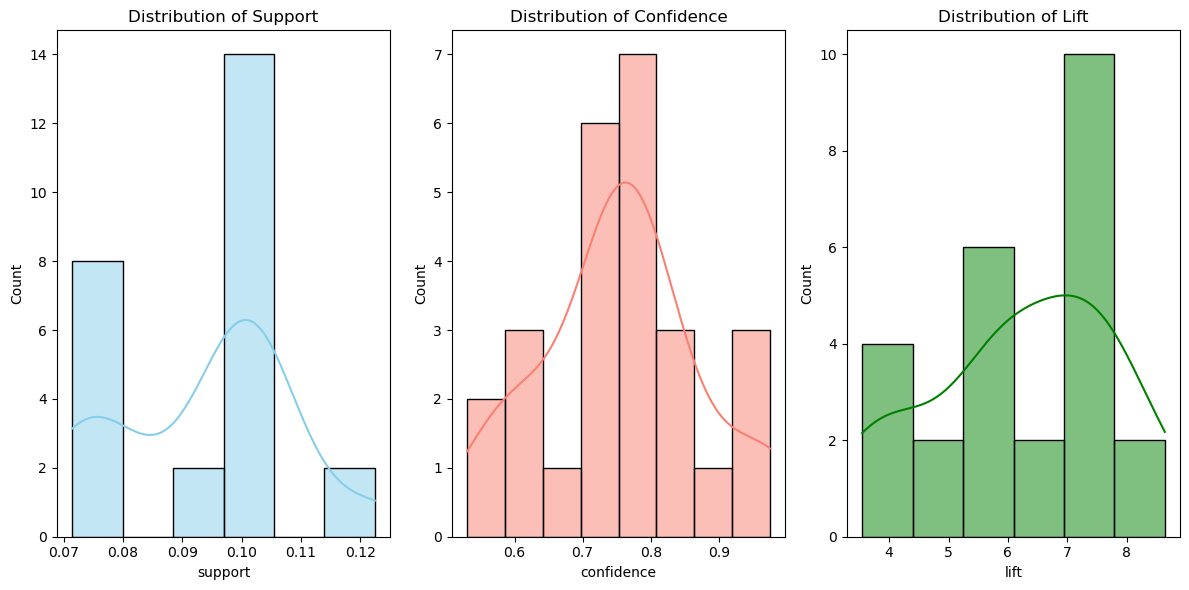

Summary of Key Metrics:
         support  confidence       lift
count  26.000000   26.000000  26.000000
mean    0.093799    0.755211   6.216524
std     0.014863    0.117008   1.536773
min     0.071429    0.530303   3.545907
25%     0.079082    0.719017   5.584046
50%     0.099490    0.761209   6.125000
75%     0.102041    0.809375   7.478947
max     0.122449    0.975000   8.642959


In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(rules['support'], kde=True, color='skyblue')
plt.title('Distribution of Support')

plt.subplot(1, 3, 2)
sns.histplot(rules['confidence'], kde=True, color='salmon')
plt.title('Distribution of Confidence')

plt.subplot(1, 3, 3)
sns.histplot(rules['lift'], kde=True, color='green')
plt.title('Distribution of Lift')

plt.tight_layout()
plt.show()

# Summarize key metrics
metrics_summary = rules[['support', 'confidence', 'lift']].describe()
print("Summary of Key Metrics:")
print(metrics_summary)


**Visualization of association rules**

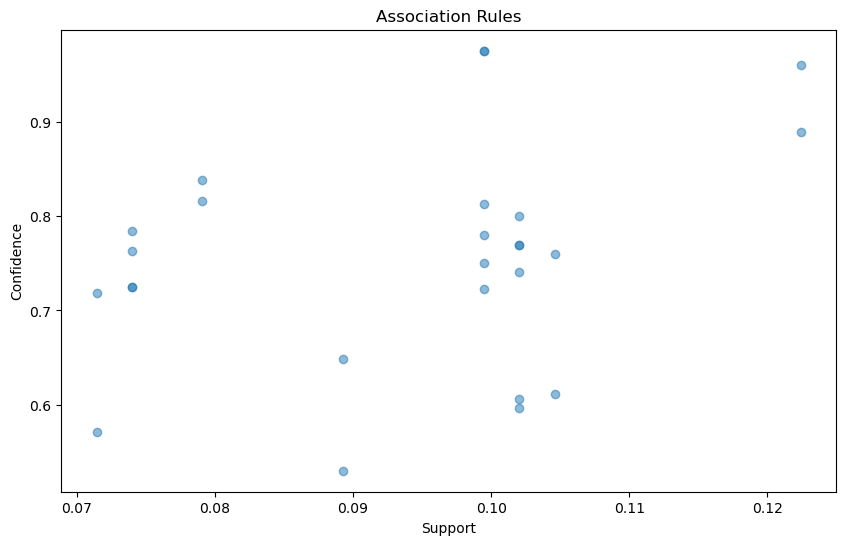

In [49]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules')
plt.show()


- This plot visualizes the relationship between support and confidence values of association rules.

- We can observe the clustering of association rules based on their support and confidence values. Rules with higher support and confidence are clustered towards the upper right corner, indicating stronger associations.

**Network graph of association rules**

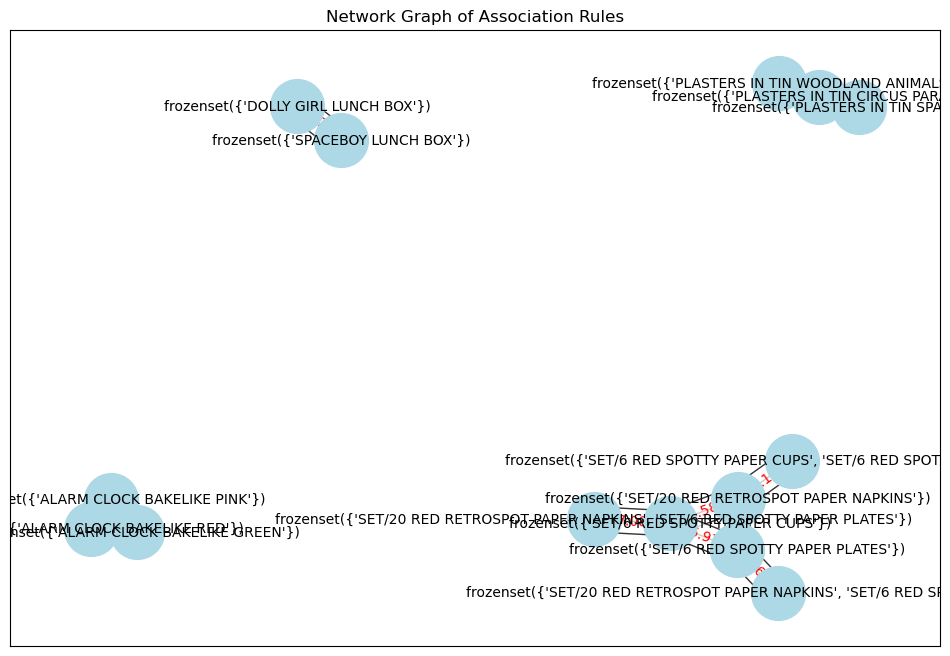

In [50]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
for idx, row in rules.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['lift'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)  # k adjusts the distance between nodes
nx.draw_networkx(G, pos, node_size=1500, node_color='lightblue', font_size=10, with_labels=True)

# Adjust the position of edge labels to prevent overlapping
edge_labels = {(i, j): round(d['weight'], 2) for i, j, d in G.edges(data=True)}
edge_label_pos = nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', bbox=dict(facecolor='white', alpha=0.8))

plt.title('Network Graph of Association Rules')
plt.show()


- This graph represents association rules as nodes connected by edges, with lift values as edge weights.

- We can observe the network structure of association rules, with antecedents and consequents as nodes. Stronger associations, indicated by higher lift values, are represented by thicker edges. 

**Heatmap of association rules**

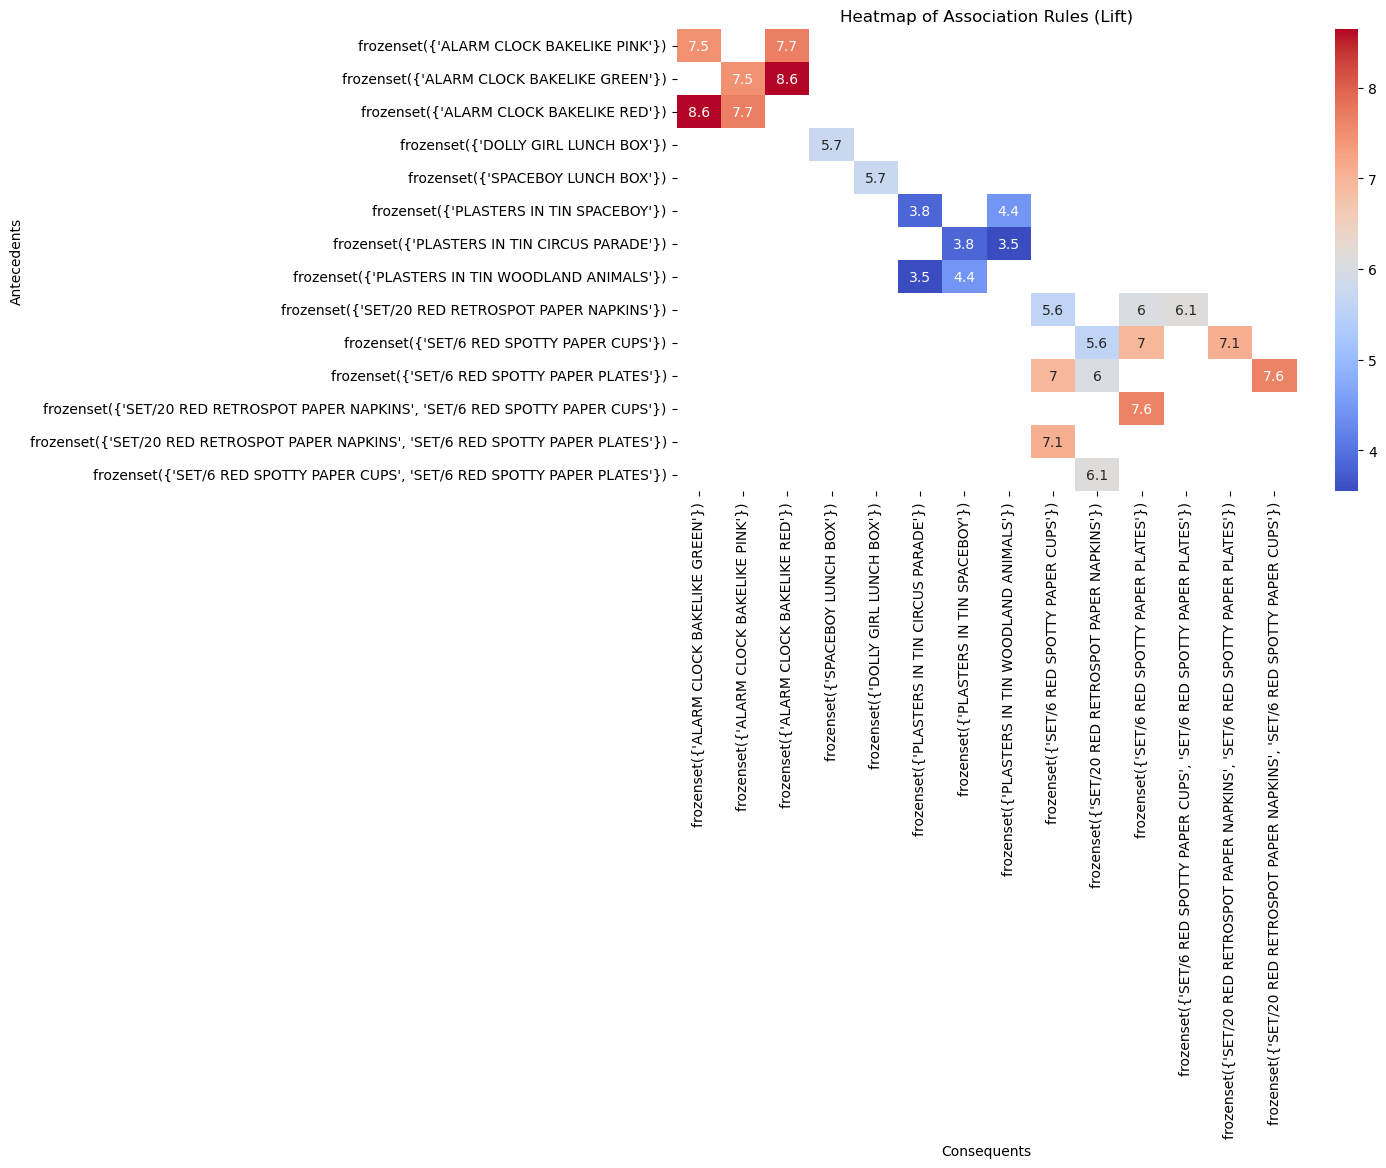

In [41]:
import seaborn as sns
plt.figure(figsize=(10, 6))
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='lift')
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Heatmap of Association Rules (Lift)')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()


- This heatmap visualizes the lift values between antecedents and consequents in association rules.

- From this, we can observe the strength of associations between different pairs of antecedents and consequents. Higher lift values indicate stronger associations which have a shade of red, while lower values indicate weaker or less significant associations which are represented by a blue shade.

**Word cloud of item descriptions**

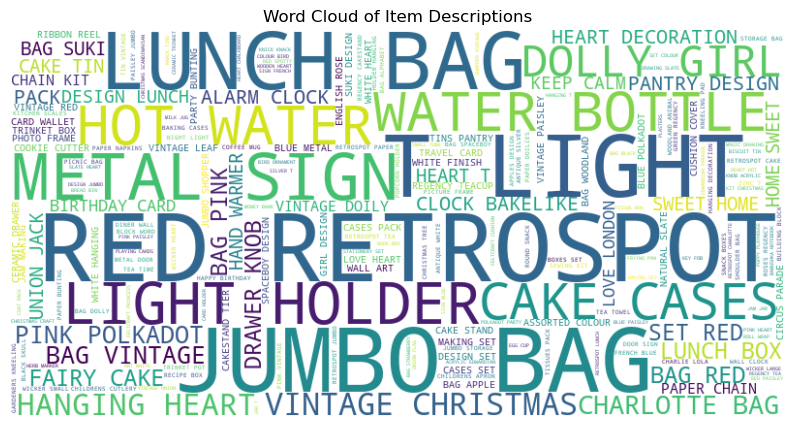

In [42]:
from wordcloud import WordCloud

wordcloud_text = ' '.join(df['Description'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Item Descriptions')
plt.axis('off')
plt.show()


- This word cloud displays the most frequently occurring item descriptions in the dataset.

- Larger and more prominent words indicate higher frequency. Some of the common words are Red Retrospot and Jumbo Bag...This tells us that purchase of items such as Jumbo Bags comes hand in hand with purchase of other items.

**Scatter plot matrix of support, confidence, and lift**

C:\Users\Hp Elitebook\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


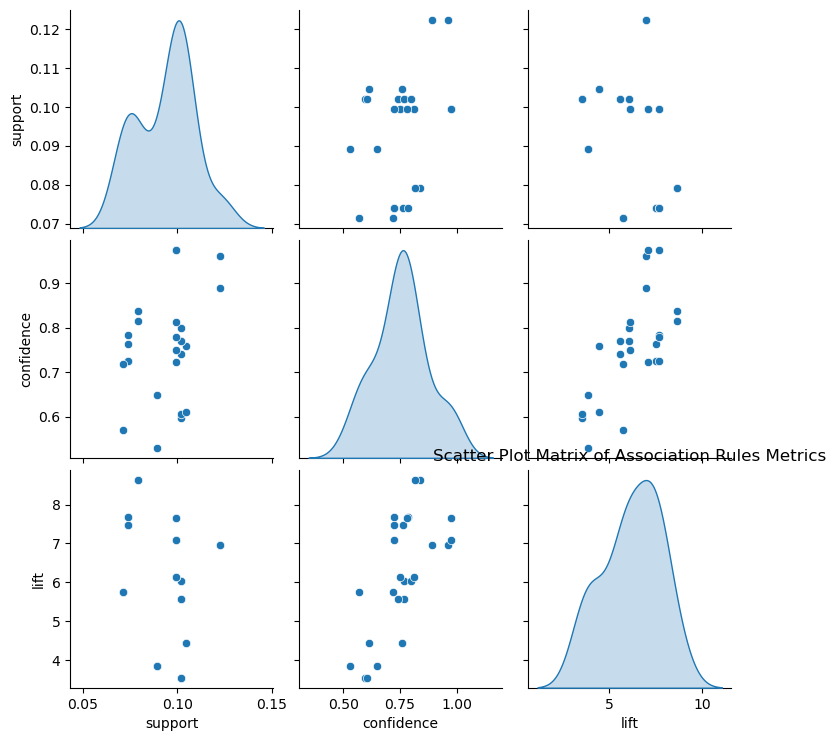

In [43]:
import seaborn as sns

sns.pairplot(rules[['support', 'confidence', 'lift']], diag_kind='kde')
plt.title('Scatter Plot Matrix of Association Rules Metrics')
plt.show()


- This scatter plot matrix visualizes the relationships between support, confidence, and lift values of association rules.

- We can observe the pairwise relationships between support, confidence, and lift values. Patterns or correlations between these metrics can provide insights into the quality and significance of association rules

**Parallel coordinates plot of association rules metrics**

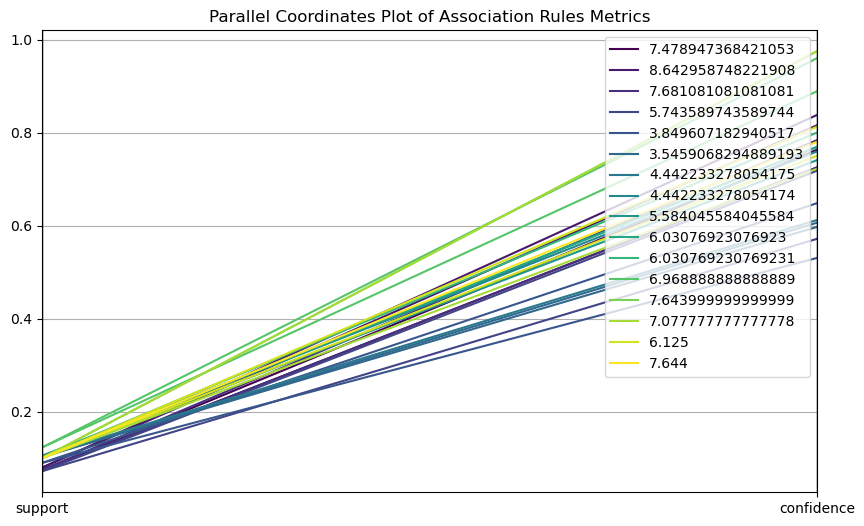

In [44]:
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(10, 6))
parallel_coordinates(rules[['support', 'confidence', 'lift']], 'lift', colormap='viridis')
plt.title('Parallel Coordinates Plot of Association Rules Metrics')
plt.show()


- This plot visualizes the support, confidence, and lift values of association rules using parallel coordinates.

**Time series plot of quantity sold over time**

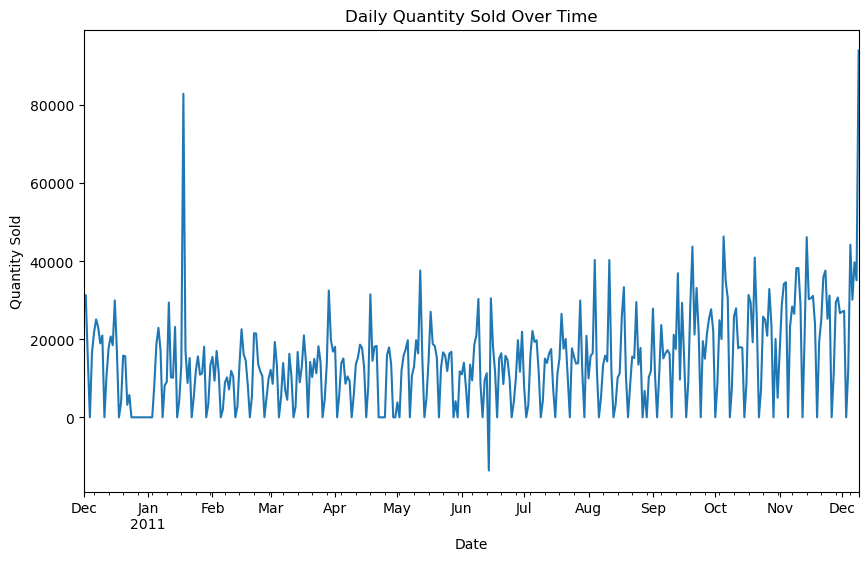

In [45]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

plt.figure(figsize=(10, 6))
df.resample('D', on='InvoiceDate')['Quantity'].sum().plot()
plt.title('Daily Quantity Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()


- This plot displays the daily quantity sold over time.

- We can observe the trends and patterns in the quantity of products sold over time. Seasonal fluctuations, trends, and anomalies in sales volume can be identified from this plot.

- It can be observed that some days had exponentialy high sales.

**Pie chart of the top 10 most frequent items**

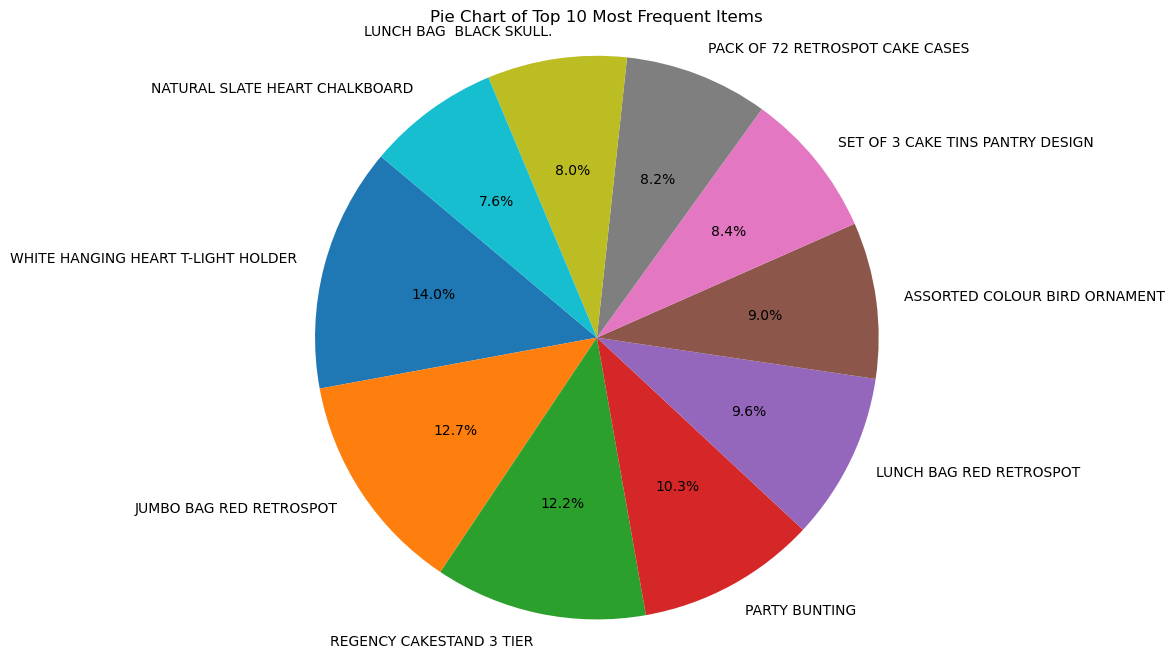

In [46]:
top_items = df['Description'].value_counts().head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_items, labels=top_items.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Top 10 Most Frequent Items')
plt.axis('equal')
plt.show()


From this chart, We can observe the relative frequencies of the top 10 most popular items ranging from white hanging heart T-light holder to natural slate heart chalkboard. This information proves to be useful for understanding customer preferences and identifying best-selling products.

**Box plots of support, confidence, and lift**

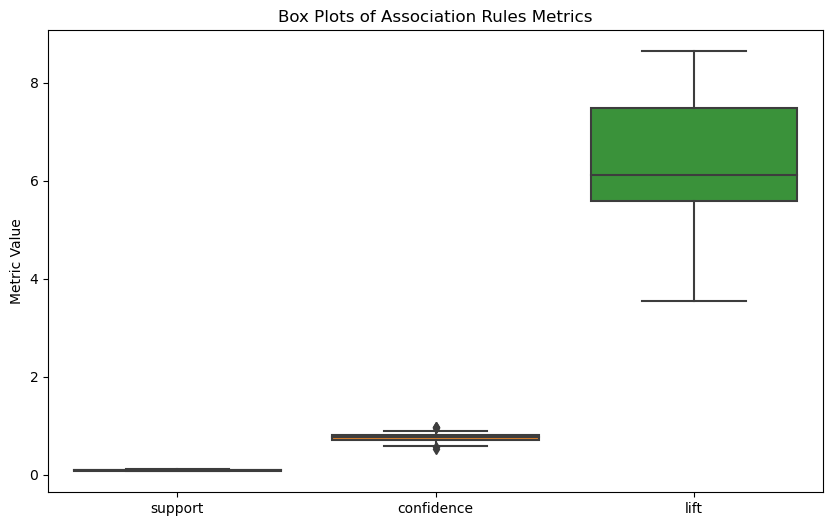

In [47]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=rules[['support', 'confidence', 'lift']])
plt.title('Box Plots of Association Rules Metrics')
plt.ylabel('Metric Value')
plt.show()



These box plots display the distributions of support, confidence, and lift values of association rules.

Observations: 
- **Support**: The box plot for support indicates that the majority of association rules have a support value centered around 0, with some rules having higher support values. This suggests that most rules are associated with relatively less frequent itemsets, while a few rules are associated with more frequent itemsets. 

- **Confidence**: The box plot for confidence shows that the majority of association rules have a confidence value of 1, indicating that these rules have high confidence in the occurrence of consequents given antecedents. 

- **Lift**: This box plot indicates that the majority of association rules have a lift value centered around 6, with some rules having higher lift values. A lift value of 6 suggests that the antecedent and consequent items are six times more likely to occur together than if they were independent. Outliers or extreme values in the lift distribution indicate potentially interesting or significant rules with strong associations between items.
